In [82]:
%matplotlib inline
import pandas as pd

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [83]:
bikes= pd.read_csv("bike.csv",encoding= 'unicode_escape')
bikes

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [90]:
bikes=  bikes.loc[(bikes["Functioning Day"]=="Yes"), : ]
bikes

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


(array([3366., 1610., 1310.,  908.,  512.,  408.,  248.,   61.,   26.,
          16.]),
 array([2.0000e+00, 3.5740e+02, 7.1280e+02, 1.0682e+03, 1.4236e+03,
        1.7790e+03, 2.1344e+03, 2.4898e+03, 2.8452e+03, 3.2006e+03,
        3.5560e+03]),
 <BarContainer object of 10 artists>)

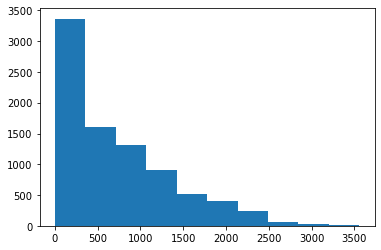

In [91]:
import matplotlib.pyplot as plt

plt.hist(bikes["Rented Bike Count"])

In [92]:
bikes.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000
mean,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.14912,0.077685
std,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,13.242399,0.868245,1.12554,0.444063
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.00000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.00000,0.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.00000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.00000,8.800000


Gráficos de dispersão:


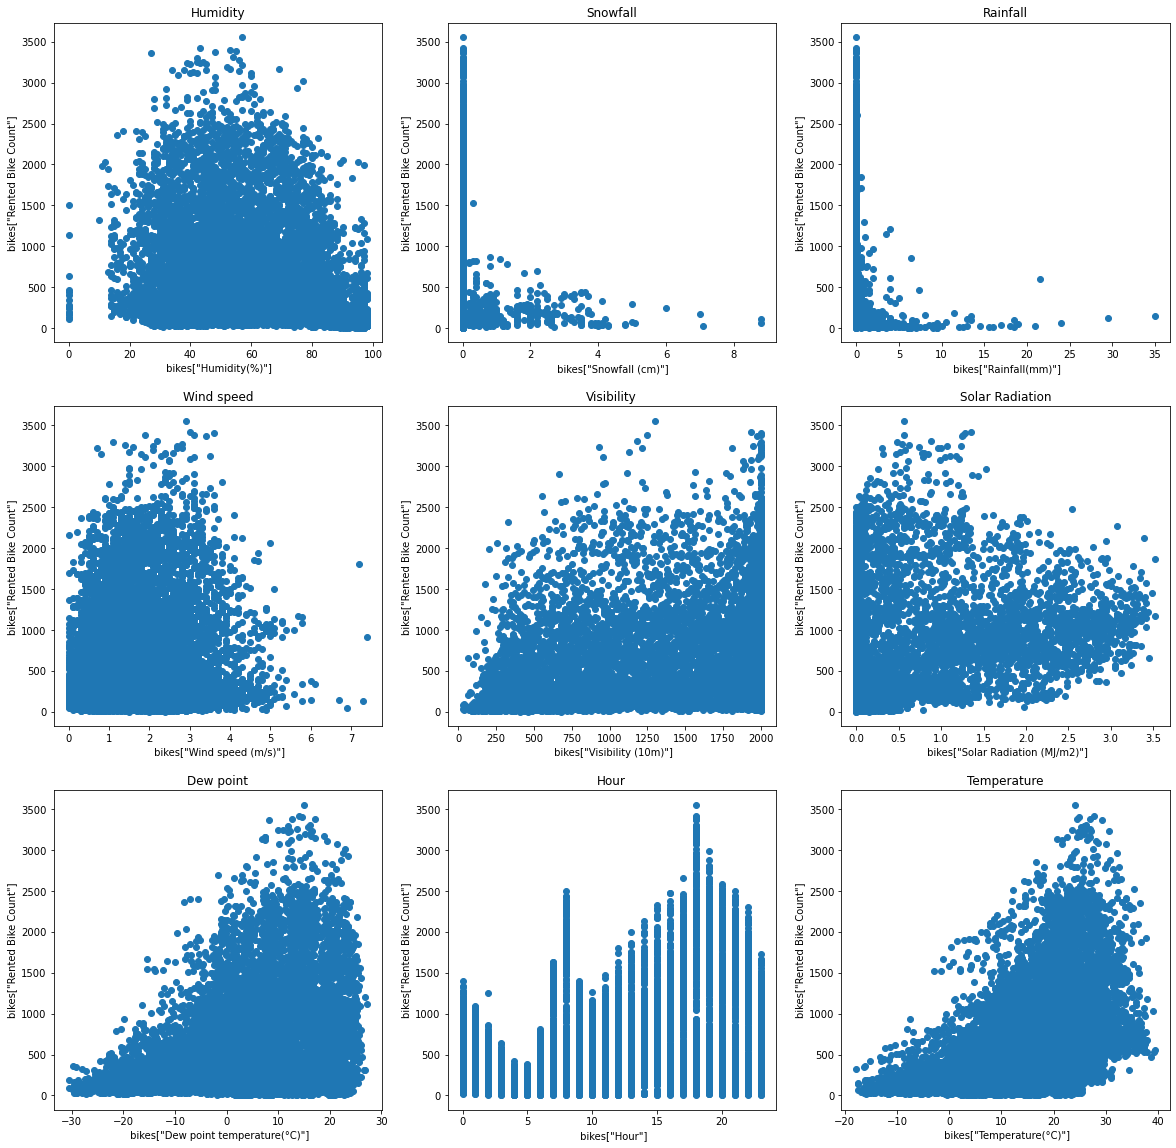

In [93]:
print("Gráficos de dispersão:")
fig = plt.figure(figsize=(20, 20))
plt.subplot(331)
plt.scatter( bikes['Humidity(%)'], bikes["Rented Bike Count"])
plt.title("Humidity")
plt.xlabel(' bikes["Humidity(%)"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.subplot(332)
plt.scatter( bikes['Snowfall (cm)'], bikes["Rented Bike Count"])
plt.title("Snowfall")
plt.xlabel(' bikes["Snowfall (cm)"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.subplot(333)
plt.scatter( bikes['Rainfall(mm)'], bikes["Rented Bike Count"])
plt.title("Rainfall")
plt.xlabel(' bikes["Rainfall(mm)"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.subplot(334)
plt.scatter( bikes['Wind speed (m/s)'], bikes["Rented Bike Count"])
plt.title("Wind speed")
plt.xlabel(' bikes["Wind speed (m/s)"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.subplot(335)
plt.scatter( bikes['Visibility (10m)'], bikes["Rented Bike Count"])
plt.title("Visibility")
plt.xlabel(' bikes["Visibility (10m)"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.subplot(336)
plt.scatter( bikes['Solar Radiation (MJ/m2)'], bikes["Rented Bike Count"])
plt.title("Solar Radiation")
plt.xlabel(' bikes["Solar Radiation (MJ/m2)"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.subplot(337)
plt.scatter( bikes['Dew point temperature(°C)'], bikes["Rented Bike Count"])
plt.title("Dew point")
plt.xlabel(' bikes["Dew point temperature(°C)"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.subplot(338)
plt.scatter( bikes['Hour'], bikes["Rented Bike Count"])
plt.title("Hour")
plt.xlabel(' bikes["Hour"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.subplot(339)
plt.scatter( bikes['Temperature(°C)'], bikes["Rented Bike Count"])
plt.title("Temperature")
plt.xlabel(' bikes["Temperature(°C)"]')
plt.ylabel('bikes["Rented Bike Count"]')
plt.show()

In [94]:
print("Correlação:")
bikes.corr()["Rented Bike Count"].sort_values()

Correlação:


Humidity(%)                 -0.201973
Snowfall (cm)               -0.151611
Rainfall(mm)                -0.128626
Wind speed (m/s)             0.125022
Visibility (10m)             0.212323
Solar Radiation (MJ/m2)      0.273862
Dew point temperature(°C)    0.400263
Hour                         0.425256
Temperature(°C)              0.562740
Rented Bike Count            1.000000
Name: Rented Bike Count, dtype: float64

As variáveis quantitativas que mais influenciam, em ordem decrescente, a quantidade de bicicletas alugadas por hora são: 

Temperature(°C); 
Hour; 
Dew point temperature(°C); 
Solar Radiation (MJ/m2); 
Humidity(%);
Visibility (10m);
Snowfall (cm);
Rainfall(mm);
Wind speed (m/s)

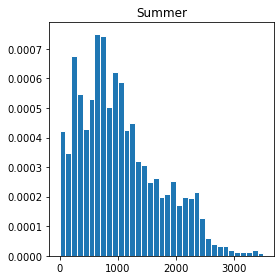

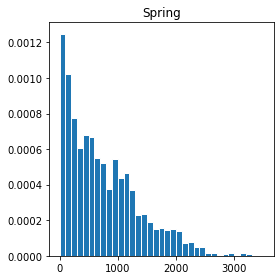

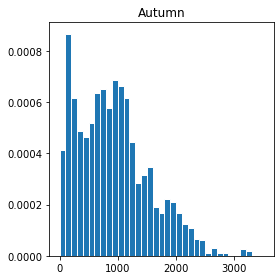

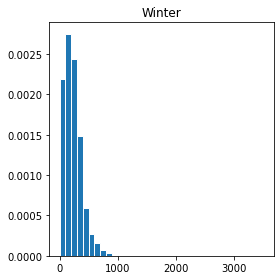

In [97]:
# Agora para Seasons, Holiday e Functioning Day
import numpy as np
bikessummer = bikes.loc[(bikes["Seasons"]=="Summer"), ["Rented Bike Count"] ]
plt.figure(figsize=(4,4))
plt.hist(bikessummer["Rented Bike Count"], bins=np.arange(0, bikes["Rented Bike Count"].max(), 100), edgecolor='white', density=True)
plt.title("Summer")
plt.tight_layout()
plt.show()
plt.figure(figsize=(4,4))
bikesspring = bikes.loc[(bikes["Seasons"]=="Spring"), ["Rented Bike Count"] ]
plt.hist(bikesspring["Rented Bike Count"], bins=np.arange(0, bikes["Rented Bike Count"].max(), 100), edgecolor='white', density=True)
plt.title("Spring")
plt.tight_layout()
plt.show()
plt.figure(figsize=(4,4))
bikesautumn = bikes.loc[(bikes["Seasons"]=="Autumn"), ["Rented Bike Count"] ]
plt.hist(bikesautumn["Rented Bike Count"], bins=np.arange(0, bikes["Rented Bike Count"].max(), 100), edgecolor='white', density=True)
plt.title("Autumn")
plt.tight_layout()
plt.show()
plt.figure(figsize=(4,4))
bikeswinter = bikes.loc[(bikes["Seasons"]=="Winter"), ["Rented Bike Count"] ]
plt.hist(bikeswinter["Rented Bike Count"], bins=np.arange(0, bikes["Rented Bike Count"].max(), 100), edgecolor='white', density=True)
plt.title("Winter")
plt.tight_layout()
plt.show()


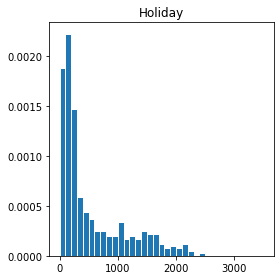

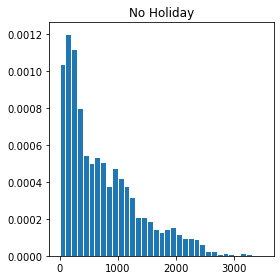

In [102]:
bikesholiday= bikes.loc[(bikes["Holiday"]=="Holiday"), ["Rented Bike Count"] ]
plt.figure(figsize=(4,4))
plt.hist(bikesholiday["Rented Bike Count"], bins=np.arange(0, bikes["Rented Bike Count"].max(), 100), edgecolor='white', density=True)
plt.title("Holiday")
plt.tight_layout()
plt.show()
bikesnholiday= bikes.loc[(bikes["Holiday"]=="No Holiday"), ["Rented Bike Count"] ]
plt.figure(figsize=(4,4))
plt.hist(bikesnholiday["Rented Bike Count"], bins=np.arange(0, bikes["Rented Bike Count"].max(), 100), edgecolor='white', density=True)
plt.title("No Holiday")
plt.tight_layout()
plt.show()